In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

# Step 1: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target variable

# Step 2: Use SelectKBest with the chi2 score function to select the top 2 features
select_kbest = SelectKBest(score_func=chi2, k=2)
X_new = select_kbest.fit_transform(X, y)

# Step 3: Get the selected feature names
selected_features = X.columns[select_kbest.get_support(indices=True)]

# Print the selected feature names
print(selected_features)


Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [2]:
#Exercise 2

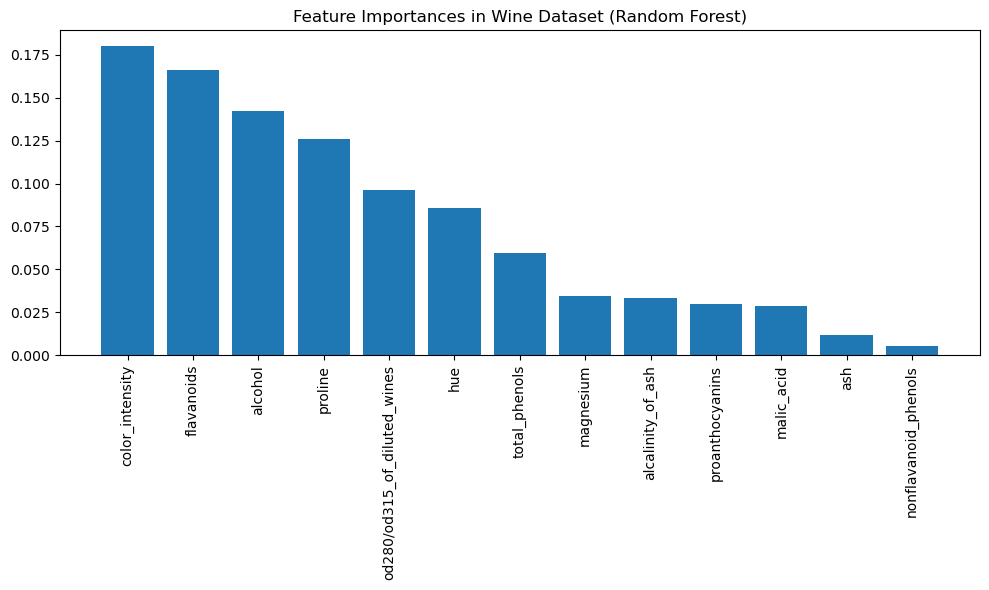

In [3]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the Wine dataset
wine = load_wine()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Get feature names
feature_names = wine.feature_names

# Visualize feature importances
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Wine Dataset (Random Forest)")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

In [4]:
#Ex3

In [5]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)  # Features
y = breast_cancer.target  # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Use RFE with a Support Vector Machine (SVM) classifier to select features
svm = SVC(kernel='linear', random_state=42)  # SVM with linear kernel
rfe = RFE(estimator=svm, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

#Train an SVM model with the selected features
X_train_rfe = rfe.transform(X_train)  # Transform training data to selected features
X_test_rfe = rfe.transform(X_test)    # Transform testing data to selected features

# Train the SVM model on the selected features
svm.fit(X_train_rfe, y_train)

#Evaluate the model performance on the test set
y_pred = svm.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

# Output the results
print("Selected Features:", X.columns[rfe.support_])
print("Model accuracy with selected features:", accuracy)


Selected Features: Index(['mean radius', 'mean concavity', 'mean concave points', 'radius error',
       'texture error', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')
Model accuracy with selected features: 0.9298245614035088


In [6]:
#Ex4

In [7]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

# Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get the coefficients of the Lasso regression (features with non-zero coefficients are selected)
selected_features = lasso.coef_ != 0
selected_feature_names = [diabetes.feature_names[i] for i in range(len(selected_features)) if selected_features[i]]

# Train a model using only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train Lasso regression with the selected features
lasso.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test_selected)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
selected_feature_names, mse

(['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'], 2775.1840563572887)

In [8]:
#Classification Exercises

In [9]:
#Ex1

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Logistic Regression model
logreg = LogisticRegression(max_iter=200)  # Increase max_iter if convergence warning occurs
logreg.fit(X_train, y_train)

#Make predictions and evaluate the model
y_pred = logreg.predict(X_test)

# Evaluate model's accuracy
accuracy = accuracy_score(y_test, y_pred)

#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Model accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Model accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [11]:
#Ex2

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)  # Features
y = cancer.target  # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train an SVM model
svm_model = SVC()  # You can specify parameters such as kernel='linear' or 'rbf'
svm_model.fit(X_train, y_train)

#Make predictions and evaluate the model
y_pred = svm_model.predict(X_test)

#Evaluate model's accuracy
accuracy = accuracy_score(y_test, y_pred)

#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Model accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Model accuracy: 0.935672514619883
Confusion Matrix:
 [[ 52  11]
 [  0 108]]


In [13]:
#Ex3

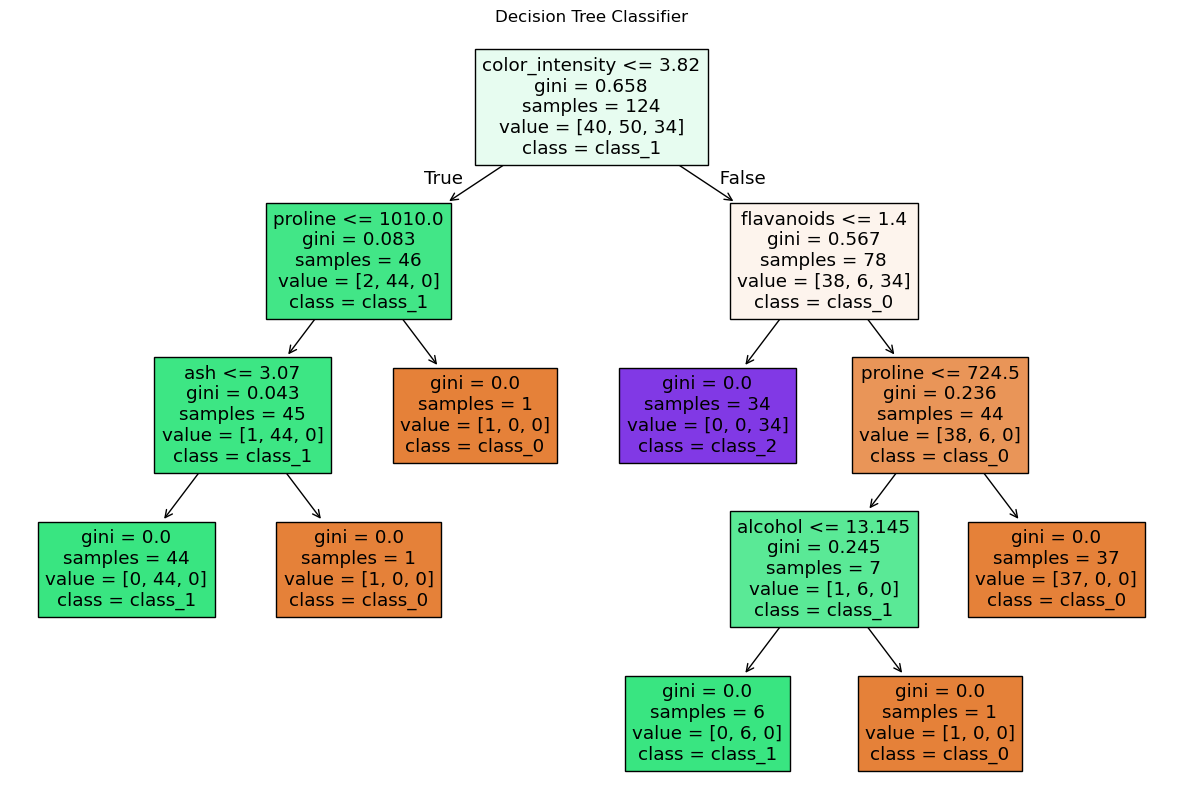

In [14]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

#Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)  # Features
y = wine.target  # Target variable

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

#Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.show()


In [15]:
#Regression exercise 

In [16]:
#Ex1

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [26]:
#Ex3

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

#Load the Diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)  # Features
y = diabetes.target  # Target variable (disease progression)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_reg.fit(X_train, y_train)

#Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

#Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 3112.9664151980814
R-squared Score: 0.4233440269603015


In [30]:
#Ex4

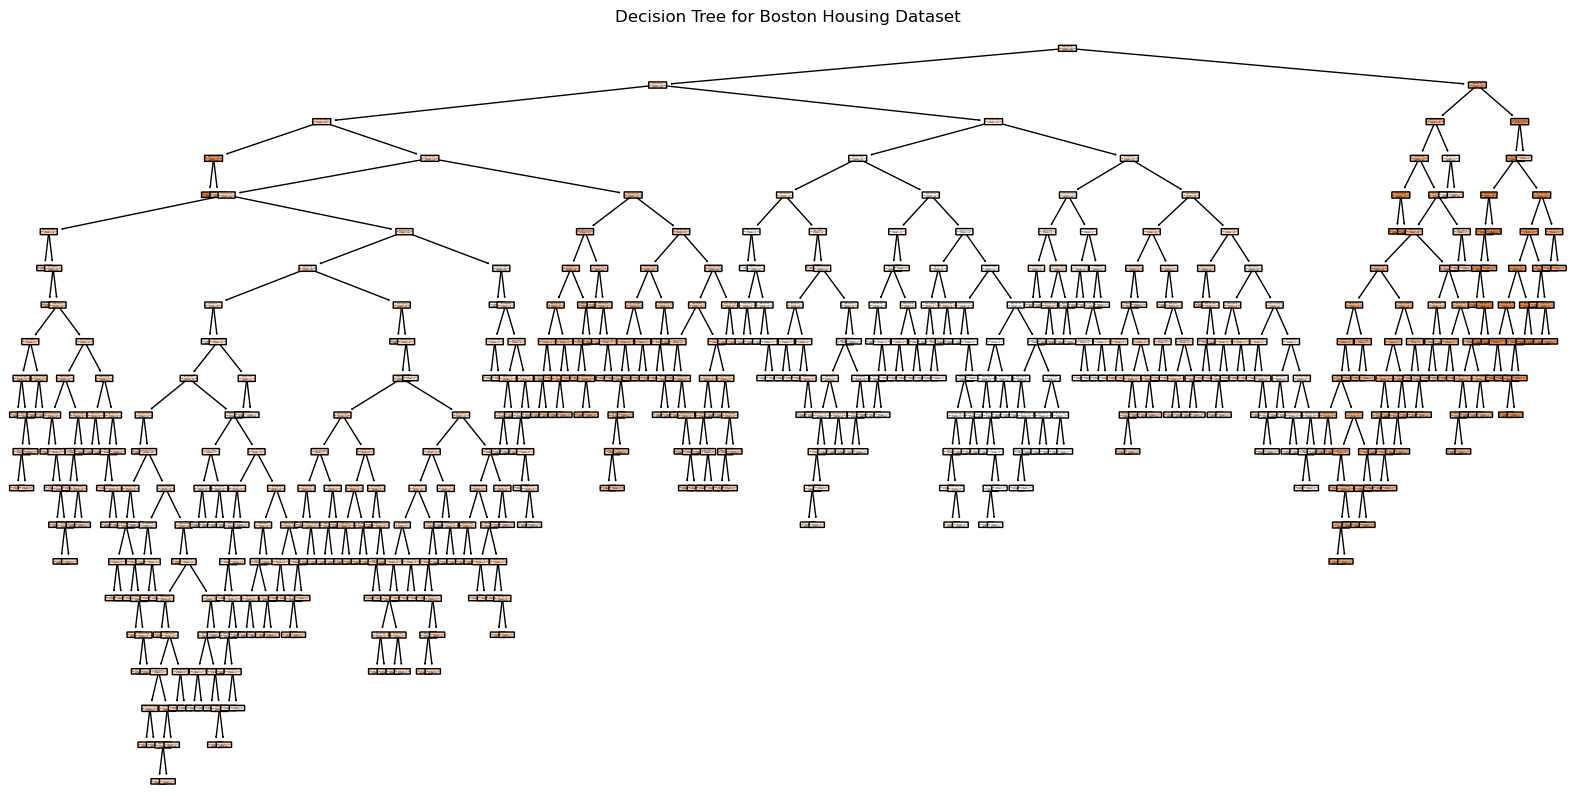

11.588026315789474

In [32]:
# Exercise 3: Decision Tree Regression
# Re-run Decision Tree Regression exercise

# Import necessary libraries for Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset (as it is deprecated in sklearn, using openml)
boston = fetch_openml(name="boston", version=1, as_frame=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model's performance using MSE
mse_dt = mean_squared_error(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, filled=True, feature_names=boston.feature_names, rounded=True)
plt.title("Decision Tree for Boston Housing Dataset")
plt.show()

mse_dt